In [264]:
import pandas as pd

In [265]:
dataframe = pd.read_csv("onlinefraud.csv")
dataframe.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [266]:
dataframe[dataframe['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
53,1,PAYMENT,1614.64,C912966811,41276.00,39661.36,M1792384402,0.00,0.00,1
74,1,PAYMENT,3454.08,C686349795,9031.96,5577.88,M1831010686,0.00,0.00,1
150,1,CASH_OUT,154139.72,C1642679791,79563.03,0.00,C564160838,410433.04,1254956.07,1
...,...,...,...,...,...,...,...,...,...,...
99930,10,TRANSFER,1707531.43,C407521144,31384.00,0.00,C1689152633,0.00,2663337.26,1
99943,10,CASH_IN,137851.05,C1075450889,569109.00,706960.05,C244428576,0.00,0.00,1
99956,10,CASH_IN,82721.79,C1711625461,43573.10,126294.90,C1297685781,13000000.00,13300000.00,1
99973,10,CASH_OUT,51601.12,C810844878,35500.00,0.00,C511450367,20549.00,0.00,1


In [267]:
replace_rules = {
    'amount': ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],  # Always replace zeros
    'oldbalanceOrg': ['PAYMENT', 'DEBIT', 'CASH_IN'],  # Replace zeros for these types
    'newbalanceOrig': ['PAYMENT', 'DEBIT', 'CASH_IN'],  # Replace zeros for these types
    'oldbalanceDest': ['DEBIT'],  # Consider replacing zeros for DEBIT
    'newbalanceDest': ['DEBIT'],  # Consider replacing zeros for DEBIT, cautiously approach CASH_IN
}
continuous_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for feature, types in replace_rules.items():
    for transaction_type in types:
        mean_value = dataframe.loc[(dataframe['type'] == transaction_type) & (dataframe[feature] != 0), feature].mean()
        dataframe.loc[(dataframe['type'] == transaction_type) & (dataframe[feature] == 0), feature] = mean_value

dataframe

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36000,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72000,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00000,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00000,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86000,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,159929.0,155908.34000,M1257036576,0.00,0.00,0
99996,10,PAYMENT,18345.49,C744303677,6206.0,278271.56837,M1785344556,0.00,0.00,0
99997,10,CASH_IN,183774.91,C104331851,39173.0,222947.91000,C36392889,54925.05,0.00,0
99998,10,CASH_OUT,82237.17,C707662966,6031.0,0.00000,C1553004158,592635.66,799140.46,0


In [268]:
# One-Hot Encoding for 'type' Column
dataframe = pd.get_dummies(dataframe, columns=['type'])
dataframe.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [269]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding for 'nameOrig' and 'nameDest' to be ready for probable analysis
label_encoder = LabelEncoder()
dataframe['nameOrig'] = label_encoder.fit_transform(dataframe['nameOrig'])
dataframe['nameDest'] = label_encoder.fit_transform(dataframe['nameDest'])
dataframe.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,11862,170136.0,160296.36,31981,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,34345,21249.0,19384.72,33288,0.0,0.0,0,0,0,0,1,0
2,1,181.00,15636,181.0,0.00,9303,0.0,0.0,1,0,0,0,0,1
3,1,181.00,91777,181.0,0.00,8273,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,54041,41554.0,29885.86,16681,0.0,0.0,0,0,0,0,1,0


In [270]:
# Features: X, Target variable: y
X = dataframe
y = dataframe['isFraud']

dataframe['isFraud'].value_counts()

0    97884
1     2116
Name: isFraud, dtype: int64

In [271]:
min_max_values = {}
for feature in continuous_features:
    min_max_values[feature] = {'min': X[feature].min(), 'max': X[feature].max()}
min_max_values

{'amount': {'min': 0.32, 'max': 10000000.0},
 'oldbalanceOrg': {'min': 0.0, 'max': 33800000.0},
 'newbalanceOrig': {'min': 0.0, 'max': 34000000.0},
 'oldbalanceDest': {'min': 0.0, 'max': 34000000.0},
 'newbalanceDest': {'min': 0.0, 'max': 38900000.0}}

In [272]:
from sklearn.cluster import KMeans

N = 50
centroids_set = {}
for feature in continuous_features:
    kmeans = KMeans(n_clusters=N, random_state=42)
    labels = kmeans.fit_predict(X[[feature]].values.reshape(-1, 1))
    centroids = kmeans.cluster_centers_
    centroids_set[feature] = centroids.flatten()
    X[feature] = labels



for feature, centroids in centroids_set.items():
    print(f"Centroids for {feature}:")
    for i, centroid in enumerate(centroids):
        print(f" Cluster {i}: {centroid}")

print(X)

Centroids for amount:
 Cluster 0: 5120.6056000290555
 Cluster 1: 917107.0753636365
 Cluster 2: 2149170.176
 Cluster 3: 239433.26740030447
 Cluster 4: 455174.2145421511
 Cluster 5: 3034285.4844897958
 Cluster 6: 1204853.2558964142
 Cluster 7: 130879.20264594392
 Cluster 8: 6246333.77
 Cluster 9: 1720353.031552795
 Cluster 10: 337987.1238859877
 Cluster 11: 4215661.7892307695
 Cluster 12: 747000.5062500001
 Cluster 13: 1404661.2423109242
 Cluster 14: 10000000.0
 Cluster 15: 82745.01350332063
 Cluster 16: 2402745.295
 Cluster 17: 551670.6999879519
 Cluster 18: 2736623.6688043475
 Cluster 19: 3221166.4655813957
 Cluster 20: 34578.96392889289
 Cluster 21: 412368.4386419001
 Cluster 22: 270906.6477166667
 Cluster 23: 3819942.1446666666
 Cluster 24: 182613.2408208556
 Cluster 25: 1913755.6060958905
 Cluster 26: 1616742.3997883596
 Cluster 27: 1106702.1604778154
 Cluster 28: 303174.06276004505
 Cluster 29: 17122.18334384865
 Cluster 30: 2560734.4508602154
 Cluster 31: 673593.8354720616
 Cluste

In [273]:
from collections import Counter
for feature in continuous_features:
    cluster_distribution = Counter(X[feature])
    print(f"Cluster distribution for {feature}: {cluster_distribution}")

Cluster distribution for amount: Counter({0: 27117, 29: 14931, 20: 6714, 44: 4593, 15: 4226, 35: 4023, 7: 3954, 48: 3841, 24: 3736, 39: 3433, 3: 3282, 22: 2997, 28: 2660, 10: 2298, 42: 1975, 21: 1642, 4: 1377, 32: 1042, 17: 830, 49: 676, 31: 525, 12: 411, 38: 364, 1: 330, 27: 293, 36: 292, 34: 257, 6: 249, 13: 238, 43: 206, 26: 189, 9: 161, 25: 145, 47: 126, 45: 123, 2: 105, 40: 101, 16: 96, 30: 93, 18: 92, 46: 69, 5: 49, 19: 43, 37: 41, 23: 30, 11: 13, 33: 5, 41: 3, 14: 2, 8: 2})
Cluster distribution for oldbalanceOrg: Counter({0: 46137, 44: 14610, 48: 10756, 32: 6264, 9: 2266, 40: 1946, 24: 1442, 11: 1323, 47: 1001, 33: 991, 3: 990, 22: 889, 5: 859, 21: 832, 45: 801, 14: 747, 29: 737, 28: 647, 16: 550, 8: 496, 35: 479, 38: 464, 17: 450, 41: 389, 6: 364, 36: 356, 42: 331, 20: 267, 25: 263, 1: 257, 49: 256, 12: 238, 27: 237, 26: 201, 13: 135, 46: 123, 7: 111, 23: 101, 18: 100, 4: 92, 39: 88, 34: 70, 31: 64, 15: 60, 19: 55, 43: 52, 10: 45, 37: 34, 2: 24, 30: 10})
Cluster distribution fo

In [274]:
df_0_train = X[X['isFraud'] == 0].sample(n=1000, random_state=42)
df_1_train = X[X['isFraud'] == 1].sample(n=1000, random_state=42)

df_train = pd.concat([df_0_train, df_1_train])

df_test = X.drop(df_train.index)

X_train = df_train.drop('isFraud', axis=1)
y_train = df_train['isFraud']
X_test = df_test.drop('isFraud', axis=1)
y_test = df_test['isFraud']

# No need to use train_test_split since we manually created the training and test sets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(2000, 13) (98000, 13)
(2000,) (98000,)


In [275]:
X_train.shape

(2000, 13)

In [276]:
import numpy as np
from collections import Counter


class TreeNode:
    def __init__(self, feature=None, children=None, info_gain=None, value=None):
        self.feature = feature  # Feature index for splitting
        self.children = children if children is not None else {}  # Dictionary: feature value -> TreeNode
        self.info_gain = info_gain
        self.value = value  # Class value for leaf node

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=5, criterion='gini'):
        self.root = None
        self.most_common_class = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.criterion = criterion  # 'gini' or 'entropy'

    def fit(self, X_param, y_param):
        self.root = self._build_tree(X_param, y_param, depth=0)
        self.most_common_class = Counter(y_param).most_common(1)[0][0]

    def _calculate_gini(self, y_param):
        _, counts = np.unique(y_param, return_counts=True)
        probabilities = counts / counts.sum()
        return 1 - np.sum(probabilities**2)

    def _calculate_entropy(self, y_param):
        _, counts = np.unique(y_param, return_counts=True)
        probabilities = counts / counts.sum()
        return -np.sum(probabilities * np.log2(probabilities))

    def _best_split(self, X_param, y_param):
        best_feature, best_info_gain, best_value = None, -1, None
        n_samples, n_features = X_param.shape[0], X_param.shape[1]
        is_dataframe = isinstance(X_param, pd.DataFrame)
        current_score = self._calculate_gini(y_param) if self.criterion == 'gini' else self._calculate_entropy(y_param)

        for feature in range(n_features):
            feature_values = X_param.iloc[:, feature] if is_dataframe else X_param[:, feature]
            unique_values = np.unique(feature_values)

            for value in unique_values:
                if is_dataframe:
                    index = feature_values == value
                else:
                    index = X_param[:, feature] == value
                left_y, right_y = y_param[index], y_param[~index]

                if len(left_y) == 0 or len(right_y) == 0:
                    continue

                score = self._calculate_score([left_y, right_y], current_score)
                if score > best_info_gain:
                    best_feature, best_info_gain, best_value = feature, score, value

        return best_feature, best_info_gain, best_value


    def _calculate_score(self, groups, current_score):
        n_instances = sum([group.size for group in groups])
        weighted_score = sum([(group.size / n_instances) * (current_score - (self._calculate_gini(group) if self.criterion == 'gini' else self._calculate_entropy(group))) for group in groups])
        return weighted_score

    def _build_tree(self, X_param, y_param, depth):
        is_dataframe = isinstance(X_param, pd.DataFrame)

        if len(np.unique(y_param)) == 1 or depth >= self.max_depth:
            return TreeNode(value=Counter(y_param).most_common(1)[0][0])

        best_feature, best_info_gain, _ = self._best_split(X_param, y_param)
        if best_feature is None:
            return TreeNode(value=Counter(y_param).most_common(1)[0][0])

        node = TreeNode(feature=best_feature, info_gain=best_info_gain)

        unique_values = np.unique(X_param.iloc[:, best_feature] if is_dataframe else X_param[:, best_feature])
        for value in unique_values:
            if is_dataframe:
                index = X_param.iloc[:, best_feature] == value
            else:
                index = X_param[:, best_feature] == value
            X_subset = X_param[index] if is_dataframe else X_param[index, :]
            y_subset = y_param[index]
            child_node = self._build_tree(X_subset, y_subset, depth + 1)
            node.children[value] = child_node

        return node


    def predict(self, X_param):
        if isinstance(X_param, pd.DataFrame):
            return np.array([self._predict_sample(self.root, row) for _, row in X_param.iterrows()])
        elif isinstance(X_param, np.ndarray):
            return np.array([self._predict_sample(self.root, row) for row in X_param])


    def _predict_sample(self, node, sample):
        if node.is_leaf_node():
            return node.value

        feature_value = sample[node.feature] if isinstance(sample, (pd.Series, np.ndarray)) else None

        if feature_value in node.children:
            return self._predict_sample(node.children[feature_value], sample)
        else:
            return self.most_common_class


In [277]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
tree_gini = DecisionTree(max_depth=10, criterion='gini')
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
print(f"Accuracy (Gini): {accuracy_score(y_test, y_pred_gini):.2f}")
print(f"Precision (Gini): {precision_score(y_test, y_pred_gini, average='weighted'):.2f}")
print(f"Recall (Gini): {recall_score(y_test, y_pred_gini, average='weighted'):.2f}")
print(f"F1 Score (Gini): {f1_score(y_test, y_pred_gini, average='weighted'):.2f}")

Accuracy (Gini): 0.86
Precision (Gini): 0.98
Recall (Gini): 0.86
F1 Score (Gini): 0.91


In [278]:
tree_entropy = DecisionTree(max_depth=10, criterion='entropy')
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
print(f"Accuracy (Entropy): {accuracy_score(y_test, y_pred_entropy):.2f}")
print(f"Precision (Entropy): {precision_score(y_test, y_pred_entropy, average='weighted'):.2f}")
print(f"Recall (Entropy): {recall_score(y_test, y_pred_entropy, average='weighted'):.2f}")
print(f"F1 Score (Entropy): {f1_score(y_test, y_pred_entropy, average='weighted'):.2f}")

Accuracy (Entropy): 0.85
Precision (Entropy): 0.98
Recall (Entropy): 0.85
F1 Score (Entropy): 0.91


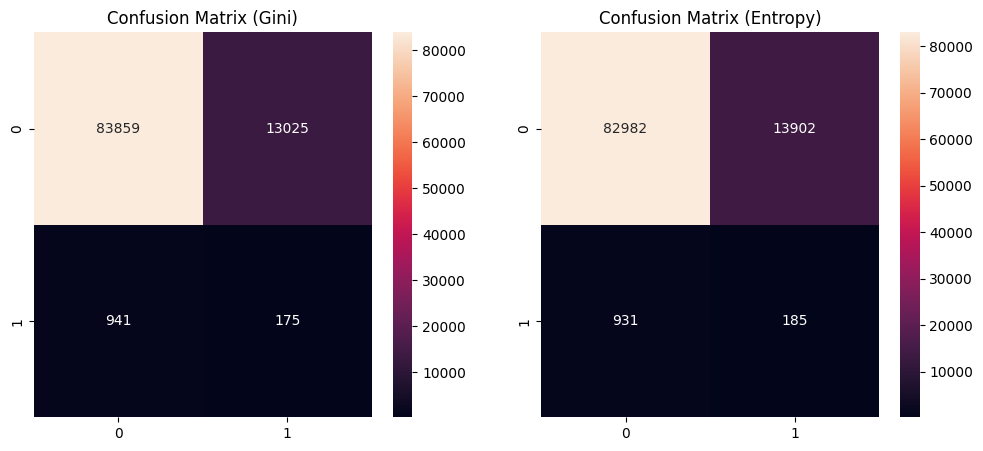

In [279]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_gini, annot=True, fmt="d", ax=ax[0])
ax[0].set_title("Confusion Matrix (Gini)")
sns.heatmap(conf_matrix_entropy, annot=True, fmt="d", ax=ax[1])
ax[1].set_title("Confusion Matrix (Entropy)")
plt.show()

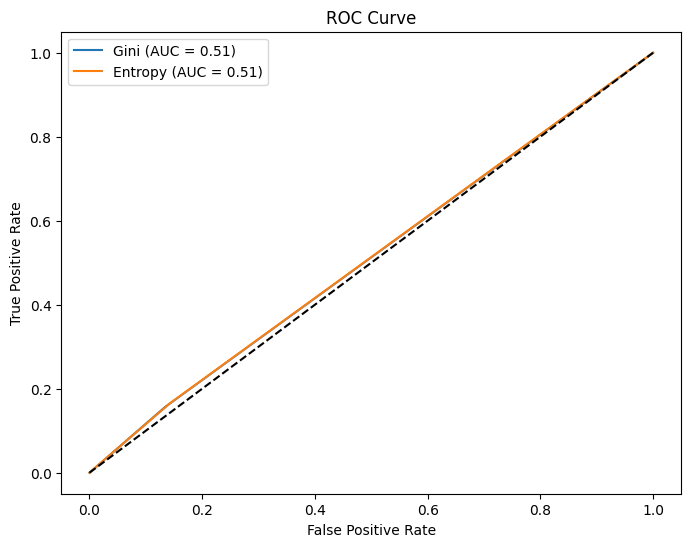

In [284]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test is your true labels and y_score_gini & y_score_entropy are the probabilities of the positive class
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

auc_gini = auc(fpr_gini, tpr_gini)
auc_entropy = auc(fpr_entropy, tpr_entropy)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gini, tpr_gini, label=f'Gini (AUC = {auc_gini:.2f})')
plt.plot(fpr_entropy, tpr_entropy, label=f'Entropy (AUC = {auc_entropy:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

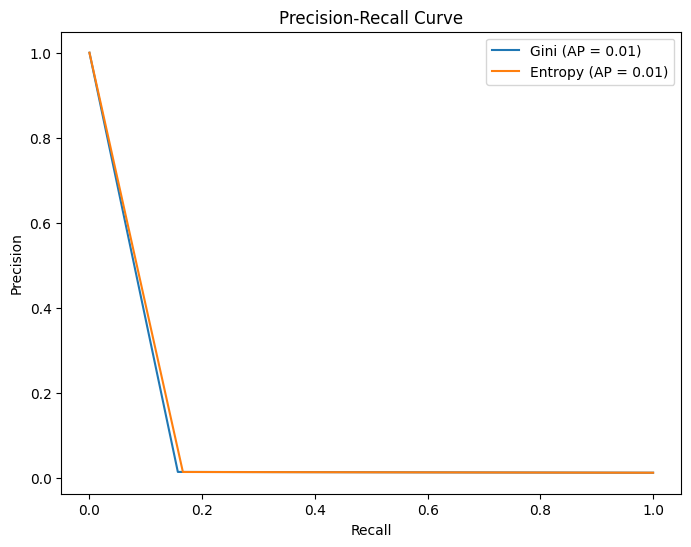

In [286]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision_gini, recall_gini, _ = precision_recall_curve(y_test, y_pred_gini)
precision_entropy, recall_entropy, _ = precision_recall_curve(y_test, y_pred_entropy)

ap_gini = average_precision_score(y_test, y_pred_gini)
ap_entropy = average_precision_score(y_test, y_pred_entropy)

plt.figure(figsize=(8, 6))
plt.plot(recall_gini, precision_gini, label=f'Gini (AP = {ap_gini:.2f})')
plt.plot(recall_entropy, precision_entropy, label=f'Entropy (AP = {ap_entropy:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [290]:
def visualize_tree(node, feature_names, depth=0, parent_name=None, edge_value=None):
    if parent_name is None:
        node_name = "root"
    else:
        node_name = f"{parent_name}_{edge_value}"

    indentation = "   " * depth

    if node.is_leaf_node():
        print(f"{indentation}{depth * '---'}Leaf Node at depth {depth}: Class = {node.value}")
    else:
        print(f"{indentation}{depth * '***'}Node at depth {depth}: Feature = {feature_names[node.feature]} | Info Gain = {node.info_gain:.2f}")

    if parent_name is not None:
        print(f"{indentation}       Edge Value = {edge_value}")

    if not node.is_leaf_node():
        for value, child in node.children.items():
            visualize_tree(child,feature_names, depth=depth + 1, parent_name=node_name, edge_value=value)

visualize_tree(tree_gini.root, X.columns)

Node at depth 0: Feature = step | Info Gain = 0.00
   ***Node at depth 1: Feature = type_CASH_OUT | Info Gain = 0.04
          Edge Value = 1
      ******Node at depth 2: Feature = amount | Info Gain = 0.02
             Edge Value = 0
         *********Node at depth 3: Feature = nameOrig | Info Gain = 0.04
                Edge Value = 0
            ------------Leaf Node at depth 4: Class = 0
                   Edge Value = 405
            ------------Leaf Node at depth 4: Class = 1
                   Edge Value = 3806
            ------------Leaf Node at depth 4: Class = 0
                   Edge Value = 4906
            ------------Leaf Node at depth 4: Class = 0
                   Edge Value = 5285
            ------------Leaf Node at depth 4: Class = 1
                   Edge Value = 19353
            ------------Leaf Node at depth 4: Class = 0
                   Edge Value = 21572
            ------------Leaf Node at depth 4: Class = 1
                   Edge Value = 21581
        

In [281]:
visualize_tree(tree_entropy.root, X.columns)

Node at depth 0: Feature = step | Info Gain = 0.00
   ***Node at depth 1: Feature = type_CASH_OUT | Info Gain = 0.08
          Edge Value = 1
      ******Node at depth 2: Feature = amount | Info Gain = 0.05
             Edge Value = 0
         *********Node at depth 3: Feature = nameOrig | Info Gain = 0.07
                Edge Value = 0
            ------------Leaf Node at depth 4: Class = 0
                   Edge Value = 405
            ------------Leaf Node at depth 4: Class = 1
                   Edge Value = 3806
            ------------Leaf Node at depth 4: Class = 0
                   Edge Value = 4906
            ------------Leaf Node at depth 4: Class = 0
                   Edge Value = 5285
            ------------Leaf Node at depth 4: Class = 1
                   Edge Value = 19353
            ------------Leaf Node at depth 4: Class = 0
                   Edge Value = 21572
            ------------Leaf Node at depth 4: Class = 1
                   Edge Value = 21581
        

In [282]:
import graphviz

def visualize_tree(node, feature_names, max_depth=3, current_depth=0, parent_name=None, edge_value=None, dot=None):
    if dot is None:
        dot = graphviz.Digraph(format='png')

    if parent_name is None:
        nodeName = "root"
    else:
        nodeName = f"{parent_name}_{edge_value}_{current_depth}"

    if node.is_leaf_node():
        dot.node(nodeName, label=f"Class: {node.value}\nDepth: {current_depth}")
        if parent_name is not None:
            dot.edge(parent_name, nodeName, label=f"Value: {edge_value}")
    else:
        dot.node(nodeName, label=f"{feature_names[node.feature]}\nGain Info.: {node.info_gain:.2f}\nDepth: {current_depth}")
        if parent_name is not None:
            dot.edge(parent_name, nodeName, label=f"Value: {edge_value}")

        if current_depth < max_depth:
            for value, child in node.children.items():
                visualize_tree(child, feature_names, max_depth, current_depth+1, nodeName, value, dot)

    return dot

dot_gini = visualize_tree(tree_gini.root, X_train.columns, max_depth=2)
dot_gini.render('decision_tree_limited_gini', view=True)
dot_entropy = visualize_tree(tree_entropy.root, X_train.columns, max_depth=2)
dot_entropy.render('decision_tree_limited_entropy', view=True)


(eog:543914): Atk-CRITICAL **: 20:29:45.309: atk_object_ref_state_set: assertion 'ATK_IS_OBJECT (accessible)' failed

(eog:543914): Gtk-CRITICAL **: 20:29:45.309: gtk_accessible_get_widget: assertion 'GTK_IS_ACCESSIBLE (accessible)' failed


'decision_tree_limited_entropy.png'